In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('/content/Onilne food order prediction.csv')

In [3]:
df.columns

Index(['COMMENT_ID', 'AUTHOR', 'DATE', 'CONTENT', 'CLASS', 'Unnamed: 5', 'Age',
       'Gender', 'Marital Status', 'Occupation', 'Monthly Income',
       'Educational Qualifications', 'Family size', 'latitude', 'longitude',
       'Pin code', 'Output', 'Feedback', 'Unnamed: 18'],
      dtype='object')

In [4]:
df=df.drop(['COMMENT_ID','AUTHOR','DATE','CONTENT','CLASS','Unnamed: 5'],axis=1)

In [5]:
df

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 18
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,23,Female,Single,Student,No Income,Post Graduate,2,12.9766,77.5993,560001,Yes,Positive,Yes
384,23,Female,Single,Student,No Income,Post Graduate,4,12.9854,77.7081,560048,Yes,Positive,Yes
385,22,Female,Single,Student,No Income,Post Graduate,5,12.9850,77.5533,560010,Yes,Positive,Yes
386,23,Male,Single,Student,Below Rs.10000,Post Graduate,2,12.9770,77.5773,560009,Yes,Positive,Yes


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    object 
 2   Marital Status              388 non-null    object 
 3   Occupation                  388 non-null    object 
 4   Monthly Income              388 non-null    object 
 5   Educational Qualifications  388 non-null    object 
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    object 
 11  Feedback                    388 non-null    object 
 12  Unnamed: 18                 388 non-null    object 
dtypes: float64(2), int64(3), object(8)


In [7]:
df.isna().sum()

Age                           0
Gender                        0
Marital Status                0
Occupation                    0
Monthly Income                0
Educational Qualifications    0
Family size                   0
latitude                      0
longitude                     0
Pin code                      0
Output                        0
Feedback                      0
Unnamed: 18                   0
dtype: int64

**For thorough inspection of the data i am going to use tableau for visiualization**


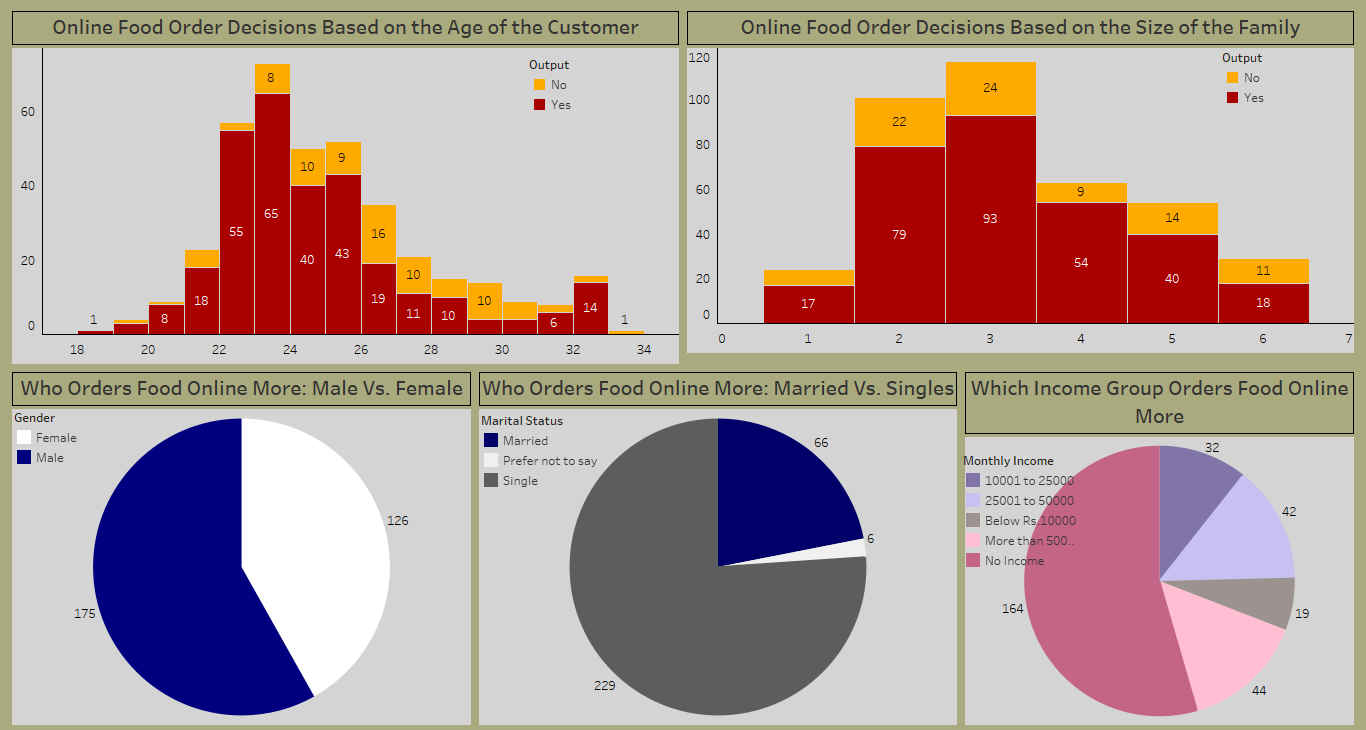

### **Observation**

**Online Food Order Decisions Based on the Age of the Customer** -- We can see that the age group of 22-25 ordered the food often again. It also means this age group is the target of online food delivery companies.

**Online Food Order Decisions Based on the Size of the Family** -- Families with 2 and 3 members are ordering food often. These can be roommates, couples, or a family of three.

**Who Orders Food Online More: Male Vs. Female** -- male customers are ordering more compared the females

**Who Orders Food Online More: Married Vs. Singles** -- According to the above figure, 76.1% of the frequent customers are singles.

**Which Income Group Orders Food Online More** -- According to the above figure, 54% of the customers don’t fall under any income group. They can be housewives or students.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    object 
 2   Marital Status              388 non-null    object 
 3   Occupation                  388 non-null    object 
 4   Monthly Income              388 non-null    object 
 5   Educational Qualifications  388 non-null    object 
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    object 
 11  Feedback                    388 non-null    object 
 12  Unnamed: 18                 388 non-null    object 
dtypes: float64(2), int64(3), object(8)


In [9]:
df['Gender'].value_counts()

Male      222
Female    166
Name: Gender, dtype: int64

In [10]:
df['Gender'].replace(['Female', 'Male'],[0,1],inplace=True)

In [11]:
df['Gender'].value_counts()

1    222
0    166
Name: Gender, dtype: int64

In [12]:
df['Marital Status'].value_counts()

Single               268
Married              108
Prefer not to say     12
Name: Marital Status, dtype: int64

In [13]:
df['Marital Status'].replace(['Single','Married','Prefer not to say'],[1,2,0],inplace=True)

In [14]:
df['Marital Status'].value_counts()

1    268
2    108
0     12
Name: Marital Status, dtype: int64

In [15]:
df['Occupation'].value_counts()

Student           207
Employee          118
Self Employeed     54
House wife          9
Name: Occupation, dtype: int64

In [16]:
df['Occupation'].replace(['Student','Employee','Self Employeed','House wife'],[1,2,3,4],inplace=True)

In [17]:
df['Occupation'].value_counts()

1    207
2    118
3     54
4      9
Name: Occupation, dtype: int64

In [18]:
df['Monthly Income'].value_counts()

No Income          187
25001 to 50000      69
More than 50000     62
10001 to 25000      45
Below Rs.10000      25
Name: Monthly Income, dtype: int64

In [19]:
df['Monthly Income'].replace(['No Income','25001 to 50000','More than 50000','10001 to 25000','Below Rs.10000'],[0,5000,7000,25000,10000],inplace=True)

In [20]:
df['Monthly Income'].value_counts()

0        187
5000      69
7000      62
25000     45
10000     25
Name: Monthly Income, dtype: int64

In [21]:
df['Educational Qualifications'].value_counts()

Graduate         177
Post Graduate    174
Ph.D              23
School            12
Uneducated         2
Name: Educational Qualifications, dtype: int64

In [22]:
df['Educational Qualifications'].replace(['Graduate','Post Graduate','Ph.D','School','Uneducated'],[1,2,3,4,5],inplace=True)

In [23]:
df['Educational Qualifications'].value_counts()

1    177
2    174
3     23
4     12
5      2
Name: Educational Qualifications, dtype: int64

In [24]:
df['Feedback'].value_counts()

Positive     317
Negative      71
Name: Feedback, dtype: int64

In [30]:
df['Feedback'].replace(['Positive','Negative '],[1,0],inplace=True)

In [31]:
df['Feedback'].value_counts()

1    317
0     71
Name: Feedback, dtype: int64

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    int64  
 2   Marital Status              388 non-null    int64  
 3   Occupation                  388 non-null    int64  
 4   Monthly Income              388 non-null    int64  
 5   Educational Qualifications  388 non-null    int64  
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    object 
 11  Feedback                    388 non-null    int64  
 12  Unnamed: 18                 388 non-null    object 
dtypes: float64(2), int64(9), object(2)


### **Online Food Order Prediction Model**

In [34]:
x = np.array(df[["Age", "Gender", "Marital Status", "Occupation","Monthly Income", "Educational Qualifications","Family size", "Pin code", "Feedback"]])
y = np.array(df[["Output"]])

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [36]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators = 500, criterion='entropy',random_state=0)

In [37]:
rf_classifier.fit(X_train,y_train)

<ipython-input-37-e6fcf1fcaf3b>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train,y_train)


RandomForestClassifier(criterion='entropy', n_estimators=500, random_state=0)

In [38]:
y_pred = rf_classifier.predict(X_test)

In [39]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8888888888888888

### **Now let’s prepare a form to input the data of the customer and predict whether the customer will order the food again or not:**

In [43]:
print("Enter Customer Details to Predict If the Customer Will Order Again")
a = int(input("Enter the Age of the Customer: "))
b = int(input("Enter the Gender of the Customer (1 = Male, 0 = Female): "))
c = int(input("Marital Status of the Customer (1 = Single, 2 = Married, 3 = Not Revealed): "))
d = int(input("Occupation of the Customer (Student = 1, Employee = 2, Self Employeed = 3, House wife = 4): "))
e = int(input("Monthly Income: "))
f = int(input("Educational Qualification (Graduate = 1, Post Graduate = 2, Ph.D = 3, School = 4, Uneducated = 5): "))
g = int(input("Family Size: "))
h = int(input("Pin Code: "))
i = int(input("Review of the Last Order (1 = Positive, 0 = Negative): "))
features = np.array([[a, b, c, d, e, f, g, h, i]])
print("Finding if the customer will order again: ", rf_classifier.predict(features))

Enter Customer Details to Predict If the Customer Will Order Again
Enter the Age of the Customer: 21
Enter the Gender of the Customer (1 = Male, 0 = Female): 1
Marital Status of the Customer (1 = Single, 2 = Married, 3 = Not Revealed): 1
Occupation of the Customer (Student = 1, Employee = 2, Self Employeed = 3, House wife = 4): 2
Monthly Income: 40000
Educational Qualification (Graduate = 1, Post Graduate = 2, Ph.D = 3, School = 4, Uneducated = 5): 1
Family Size: 4
Pin Code: 500061
Review of the Last Order (1 = Positive, 0 = Negative): 1
Finding if the customer will order again:  ['Yes']


# **Summary**

So this is how you can predict whether a customer will order food online again or not. The food order prediction system is one of the useful techniques food delivery companies can use to make the entire delivery process fast.